In [1]:
import pandas as pd

In [2]:
from IPython.core.display import HTML

In [3]:
titles = pd.read_csv('titles.csv',index_col=None)

In [4]:
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [5]:
cast = pd.read_csv('cast.csv',index_col=None)

In [6]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [7]:
superman_batman_characters = cast[(cast['character'] == 'Superman') | (cast['character'] == 'Batman')]

# Create a pivot table to count the number of Superman and Batman characters for each year
pivot_table = superman_batman_characters.pivot_table(index='year', columns='character', values='name', aggfunc='count', fill_value=0)

# Filter years where Superman characters outnumber Batman characters
superman_years = pivot_table[pivot_table['Superman'] > pivot_table['Batman']]
num_superman_years = superman_years.shape[0]
print(f"Number of Superman years in film history: {num_superman_years}")


Number of Superman years in film history: 11


In [8]:
superman_batman_characters = cast[(cast['character'] == 'Superman') | (cast['character'] == 'Batman')]

# Create a pivot table to count the number of Superman and Batman characters for each year
pivot_table = superman_batman_characters.pivot_table(index='year', columns='character', values='name', aggfunc='count', fill_value=0)

# Filter years where Batman characters outnumber Superman characters
batman_years = pivot_table[pivot_table['Batman'] > pivot_table['Superman']]

# Get the count of Batman years
num_batman_years = batman_years.shape[0]

print(f"Number of Batman years in film history: {num_batman_years}")


Number of Batman years in film history: 27


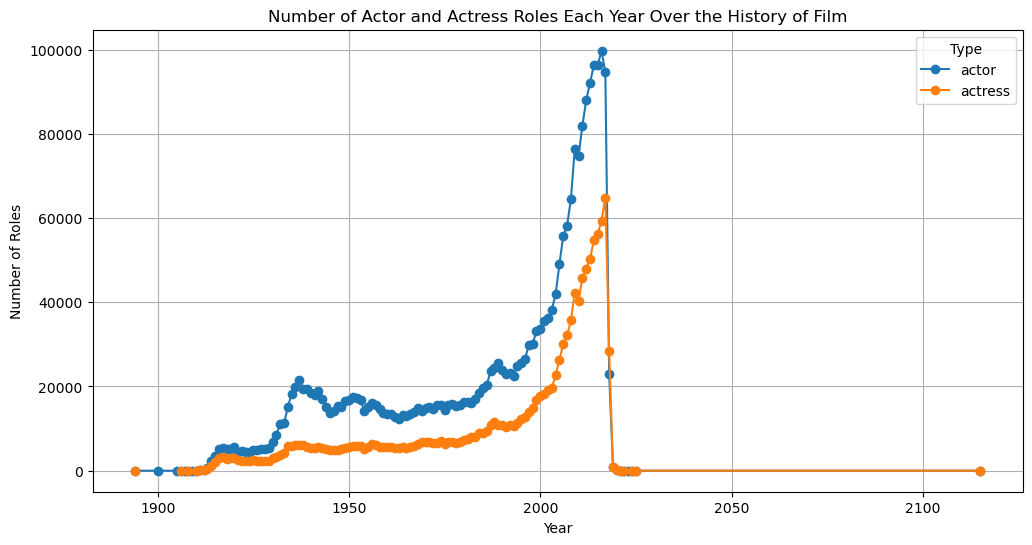

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

roles_by_year_and_type = cast.groupby(['year', 'type'])['type'].count().unstack()

# Create a line plot
plt.figure(figsize=(12, 6))
roles_by_year_and_type.plot(kind='line', marker='o', linestyle='-', ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Actor and Actress Roles Each Year Over the History of Film')
plt.legend(title='Type')
plt.grid(True)
plt.show()


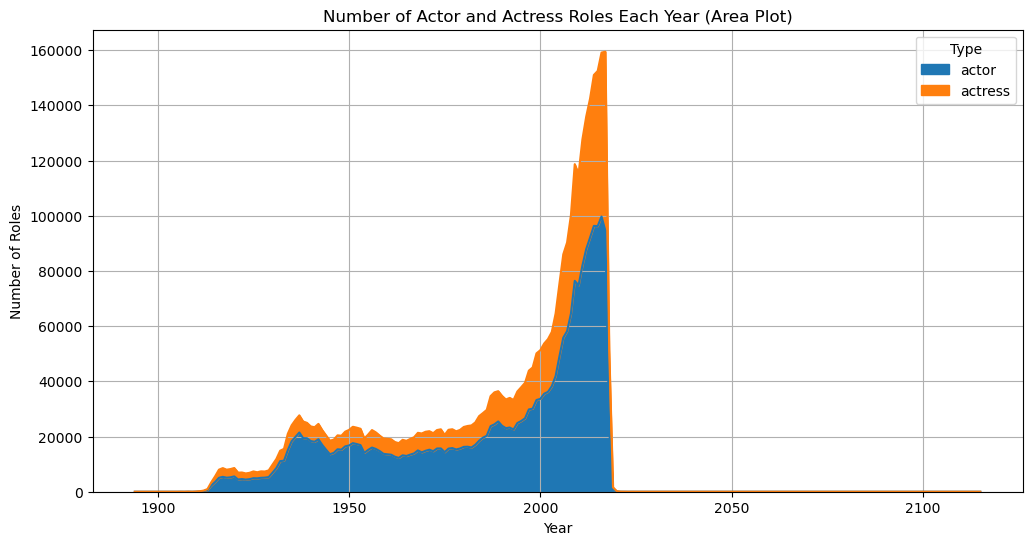

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

roles_by_year_and_type = cast.groupby(['year', 'type'])['type'].count().unstack()

# Create an area plot
plt.figure(figsize=(12, 6))
roles_by_year_and_type.plot(kind='area', ax=plt.gca(), stacked=True)
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Actor and Actress Roles Each Year (Area Plot)')
plt.legend(title='Type')
plt.grid(True)
plt.show()


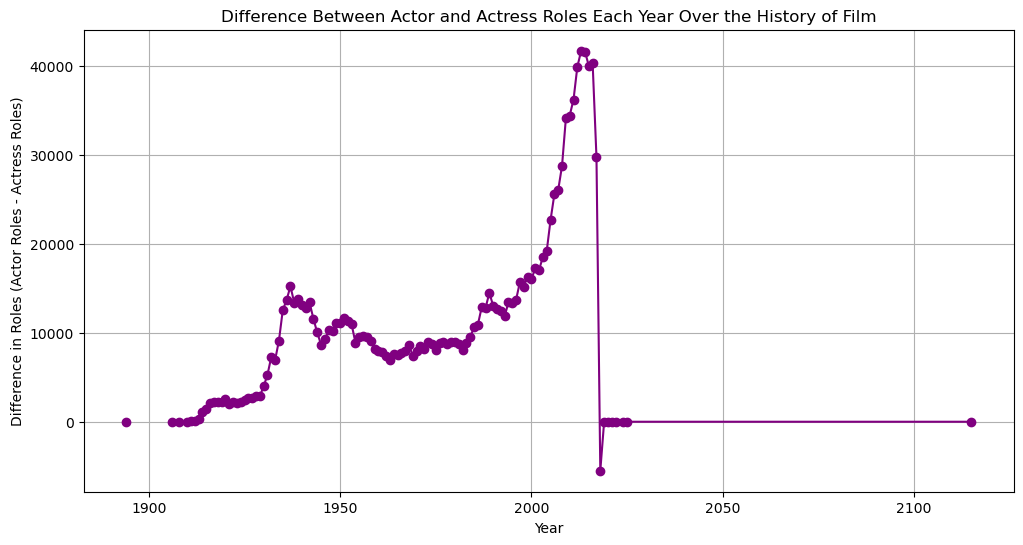

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

roles_by_year_and_type = cast.groupby(['year', 'type'])['type'].count().unstack()

# Calculate the difference between the number of actor roles and actress roles each year
difference_roles_each_year = roles_by_year_and_type['actor'] - roles_by_year_and_type['actress']

# Create a line plot
plt.figure(figsize=(12, 6))
difference_roles_each_year.plot(kind='line', marker='o', linestyle='-', color='purple')
plt.xlabel('Year')
plt.ylabel('Difference in Roles (Actor Roles - Actress Roles)')
plt.title('Difference Between Actor and Actress Roles Each Year Over the History of Film')
plt.grid(True)
plt.show()


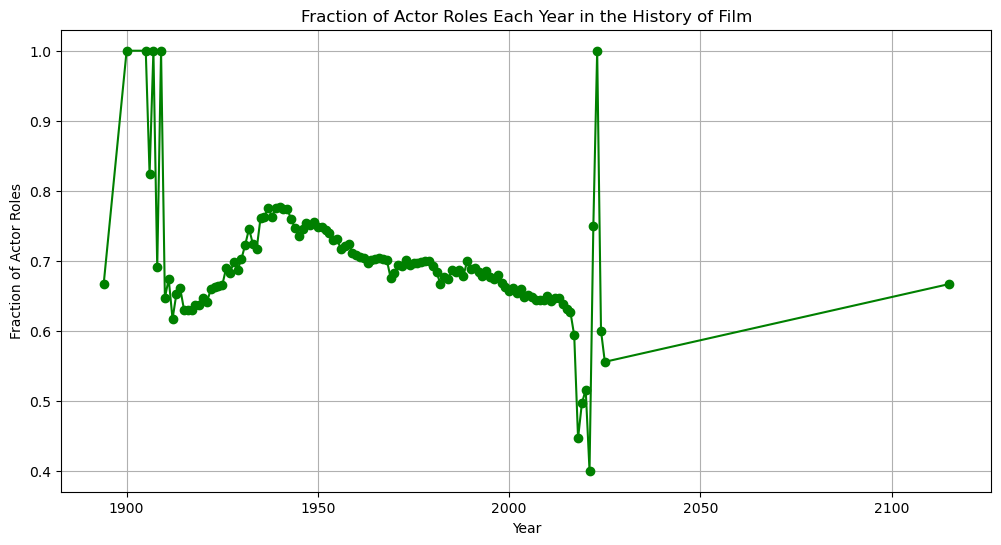

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

roles_by_year_and_type = cast.groupby(['year', 'type'])['type'].count().unstack()

# Calculate the fraction of 'actor' roles each year
total_roles_each_year = roles_by_year_and_type.sum(axis=1)
fraction_actor_roles_each_year = roles_by_year_and_type['actor'] / total_roles_each_year

# Create a line plot
plt.figure(figsize=(12, 6))
fraction_actor_roles_each_year.plot(kind='line', marker='o', linestyle='-', color='green')
plt.xlabel('Year')
plt.ylabel('Fraction of Actor Roles')
plt.title('Fraction of Actor Roles Each Year in the History of Film')
plt.grid(True)
plt.show()


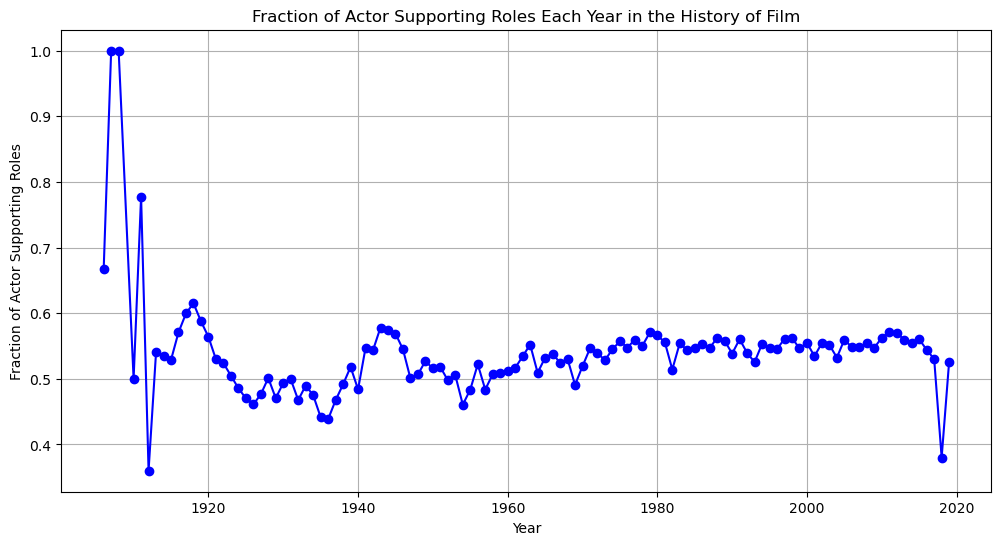

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

supporting_roles = cast[cast['n'] == 2]

# Group the DataFrame by 'year' and 'type' (actor or actress) and count the number of roles for each combination
roles_by_year_and_type = supporting_roles.groupby(['year', 'type'])['type'].count().unstack()

# Calculate the fraction of 'actor' supporting roles each year
total_roles_each_year = roles_by_year_and_type.sum(axis=1)
fraction_actor_supporting_roles_each_year = roles_by_year_and_type['actor'] / total_roles_each_year

# Create a line plot
plt.figure(figsize=(12, 6))
fraction_actor_supporting_roles_each_year.plot(kind='line', marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Fraction of Actor Supporting Roles')
plt.title('Fraction of Actor Supporting Roles Each Year in the History of Film')
plt.grid(True)
plt.show()


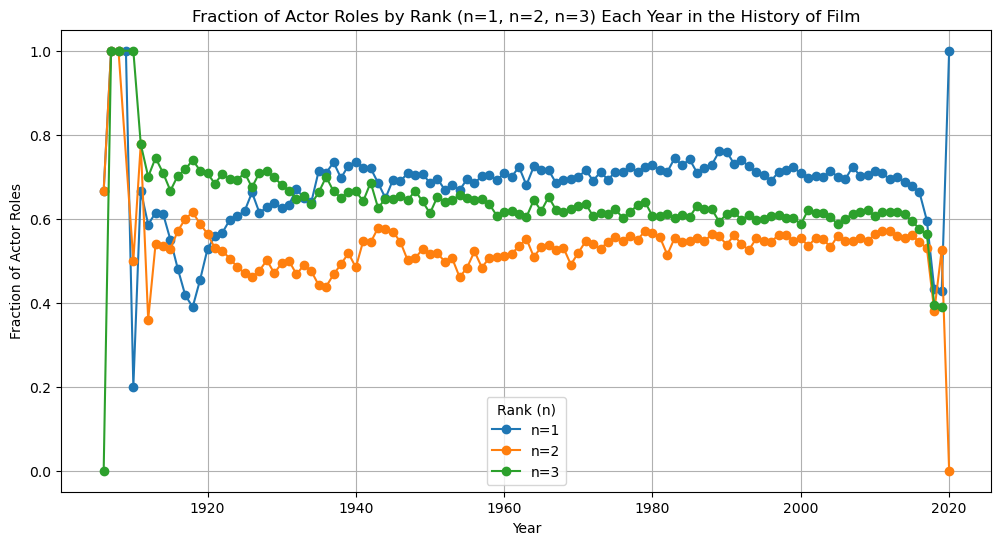

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'cast' with 'year', 'type', and 'n' columns
# 'type' should have values 'actor' for actors and 'actress' for actresses

# Filter the DataFrame to include only rows with 'n' values of 1, 2, and 3
filtered_cast = cast[cast['n'].isin([1, 2, 3])]

# Group the DataFrame by 'year', 'n', and 'type' (actor or actress) and count the number of roles for each combination
roles_by_year_rank_and_type = filtered_cast.groupby(['year', 'n', 'type'])['type'].count().unstack().fillna(0)

# Calculate the fraction of 'actor' roles for each rank (n=1, n=2, n=3) each year
total_roles_each_year = roles_by_year_rank_and_type.sum(axis=1)
fraction_actor_roles_by_rank_each_year = roles_by_year_rank_and_type['actor'] / total_roles_each_year

# Create a plot with lines for each rank (n=1, n=2, n=3)
plt.figure(figsize=(12, 6))
for n in [1, 2, 3]:
    fraction_actor_roles = fraction_actor_roles_by_rank_each_year.xs(n, level='n')
    plt.plot(fraction_actor_roles.index, fraction_actor_roles.values, marker='o', label=f'n={n}')

plt.xlabel('Year')
plt.ylabel('Fraction of Actor Roles')
plt.title('Fraction of Actor Roles by Rank (n=1, n=2, n=3) Each Year in the History of Film')
plt.legend(title='Rank (n)')
plt.grid(True)
plt.show()
